In [1]:
!pip3 install praw
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install pandas
!pip3 install nltk
!pip3 install gensim

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [10]:
import time
import praw
import pandas as pd
import json

reddit = praw.Reddit(
    client_id="Hz2zkQJCMOiFVifmyeGzrg",
    client_secret="2_ydmLRpoLBtuqOx_6WNoq1j59BZXw",
    user_agent="Emergency Management",
)



params = {'sort':'new', 'limit':None, 'time_filter':'year'}

columns = ['author', 'author_flair_text', 'clicked', 'comments', 'created_utc',
           'distinguished', 'edited', 'id', 'is_original_content', 'is_self',
           'link_flair_template_id', 'link_flair_text', 'locked', 'name',
           'num_comments', 'over_18', 'permalink', 'poll_data', 'saved', 'score',
           'selftext', 'spoiler', 'stickied', 'subreddit', 'title', 'upvote_ratio', 'url']

df = pd.DataFrame(columns=columns)
with open('./sub_keyword.json', 'r') as file:
    data = json.load(file)
iterations = data['iterations']

for iteration in iterations:
    for subreddit in iteration['subreddits']:
        for keyword in iteration['keywords']:
            for submission in reddit.subreddit(subreddit).search(keyword, **params):
                new_row = {
                    'author': submission.author.name,
                    'created_utc': int(submission.created_utc),
                    'id': submission.id,
                    'name': submission.name,
                    'num_comments': submission.num_comments,
                    'permalink': submission.permalink,
                    'selftext': submission.selftext,
                    'subreddit': submission.subreddit.display_name,
                    'title': submission.title,
                    'upvote_ratio': submission.upvote_ratio,
                    'url': submission.url
                }
                df.loc[len(df)] = new_row

df = df.drop_duplicates(subset='id', keep='first')

df.to_csv('./reddit.csv', index=False)
df.head()


,author,author_flair_text,clicked,comments,created_utc,distinguished,edited,id,is_original_content,is_self,...,poll_data,saved,score,selftext,spoiler,stickied,subreddit,title,upvote_ratio,url
0,Glad-Zucchini-6120,NaN,NaN,NaN,1692551986,NaN,NaN,15wh5a1,NaN,NaN,...,NaN,NaN,NaN,They should hire people 24/7 in forest around ...,NaN,NaN,KelownaBC,Fires,0.58,https://www.reddit.com/r/KelownaBC/comments/15...
1,Ktownews,NaN,NaN,NaN,1692488876,NaN,NaN,15vvis1,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,KelownaBC,‘We are an army out there’: West Kelowna fire ...,1.00,https://www.kelownacapnews.com/news/update-on-...
2,scrivna,NaN,NaN,NaN,1692483496,NaN,NaN,15vtdzk,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,KelownaBC,Fire progression from 15-19th August. NASA FIR...,1.00,https://i.redd.it/ab1tjqaz55jb1.gif
3,misteriousm,NaN,NaN,NaN,1692327644,NaN,NaN,15u8bf1,NaN,NaN,...,NaN,NaN,NaN,Right now I am on top of Knox. It looks very v...,NaN,NaN,KelownaBC,It's very very bad,1.00,https://www.reddit.com/gallery/15u8bf1
4,Big_papa_B,NaN,NaN,NaN,1692325530,NaN,NaN,15u7jfa,NaN,NaN,...,NaN,NaN,NaN,Be safe everyone.,NaN,NaN,KelownaBC,Time laps of west Kelowna fire. View from lake...,0.91,https://v.redd.it/g1xmndal4sib1


In [3]:
df

,author,author_flair_text,clicked,comments,created_utc,distinguished,edited,id,is_original_content,is_self,...,poll_data,saved,score,selftext,spoiler,stickied,subreddit,title,upvote_ratio,url
0,Glad-Zucchini-6120,NaN,NaN,NaN,1692551986,NaN,NaN,15wh5a1,NaN,NaN,...,NaN,NaN,NaN,They should hire people 24/7 in forest around ...,NaN,NaN,KelownaBC,Fires,0.60,https://www.reddit.com/r/KelownaBC/comments/15...
1,Ktownews,NaN,NaN,NaN,1692488876,NaN,NaN,15vvis1,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,KelownaBC,‘We are an army out there’: West Kelowna fire ...,1.00,https://www.kelownacapnews.com/news/update-on-...
2,scrivna,NaN,NaN,NaN,1692483496,NaN,NaN,15vtdzk,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,KelownaBC,Fire progression from 15-19th August. NASA FIR...,0.84,https://i.redd.it/ab1tjqaz55jb1.gif
3,misteriousm,NaN,NaN,NaN,1692327644,NaN,NaN,15u8bf1,NaN,NaN,...,NaN,NaN,NaN,Right now I am on top of Knox. It looks very v...,NaN,NaN,KelownaBC,It's very very bad,1.00,https://www.reddit.com/gallery/15u8bf1
4,Big_papa_B,NaN,NaN,NaN,1692325530,NaN,NaN,15u7jfa,NaN,NaN,...,NaN,NaN,NaN,Be safe everyone.,NaN,NaN,KelownaBC,Time laps of west Kelowna fire. View from lake...,0.91,https://v.redd.it/g1xmndal4sib1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5086,Maradar,NaN,NaN,NaN,1432576790,NaN,NaN,3787v5,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,britishcolumbia,Almost 40 residents of Cache Creek are under e...,0.94,http://www.cbc.ca/m/news/canada/british-columb...
5087,Worstdriver,NaN,NaN,NaN,1418257804,NaN,NaN,2ox6mz,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,britishcolumbia,Evacuation order for parts of Courtenay on Van...,0.87,http://www.courtenay.ca/EN/meta/news/news-arch...
5088,Mustard-Tiger,NaN,NaN,NaN,1405540619,NaN,NaN,2avz0t,NaN,NaN,...,NaN,NaN,NaN,I live in Hudson's Hope. Our Mayor just releas...,NaN,NaN,britishcolumbia,My town is being evacuated because of a forest...,0.77,https://www.reddit.com/r/britishcolumbia/comme...
5089,clothosfate,NaN,NaN,NaN,1395083631,NaN,NaN,20nh7b,NaN,NaN,...,NaN,NaN,NaN,I recently started a new job with a new emplo...,NaN,NaN,britishcolumbia,Need advice regarding new employer.,0.60,https://www.reddit.com/r/britishcolumbia/comme...


In [4]:


df['created_utc_clean'] = df['created_utc'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(x)))
df['created_utc_clean'].head()

0    2023-08-20 11:19:46
1    2023-08-19 17:47:56
2    2023-08-19 16:18:16
3    2023-08-17 21:00:44
4    2023-08-17 20:25:30
Name: created_utc_clean, dtype: object

In [5]:
df['created_utc_clean'].tail()

5086    2015-05-25 11:59:50
5087    2014-12-10 17:30:04
5088    2014-07-16 13:56:59
5089    2014-03-17 13:13:51
5090    2012-09-09 19:10:44
Name: created_utc_clean, dtype: object

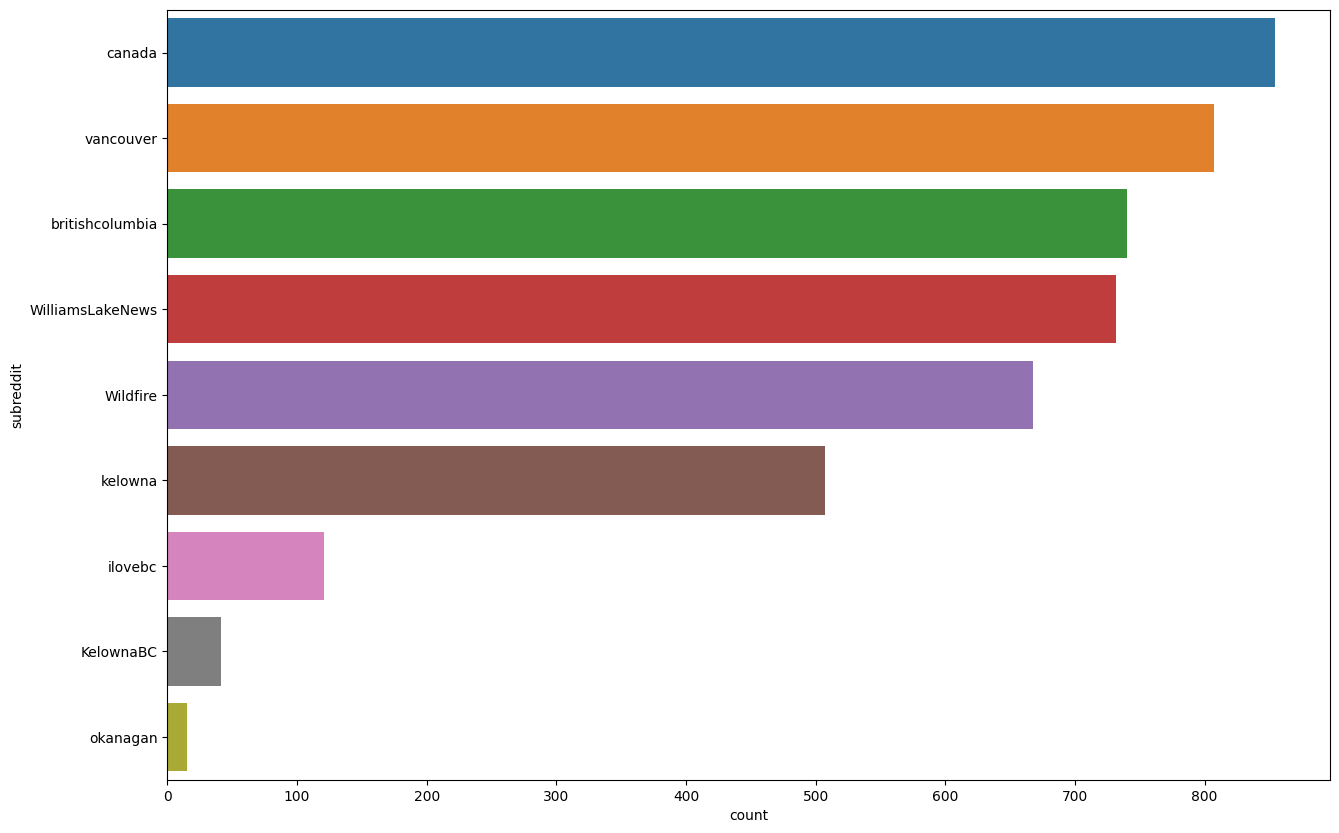

In [6]:
# create a fig with most frequent subreddits
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="subreddit", data=df, order=df['subreddit'].value_counts().iloc[:10].index, ax=ax)
plt.show()

In [7]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/alirezaarvandi/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/alirezaarvandi/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/alirezaarvandi/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/alirezaarvandi/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/alirezaarvandi/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-da

True

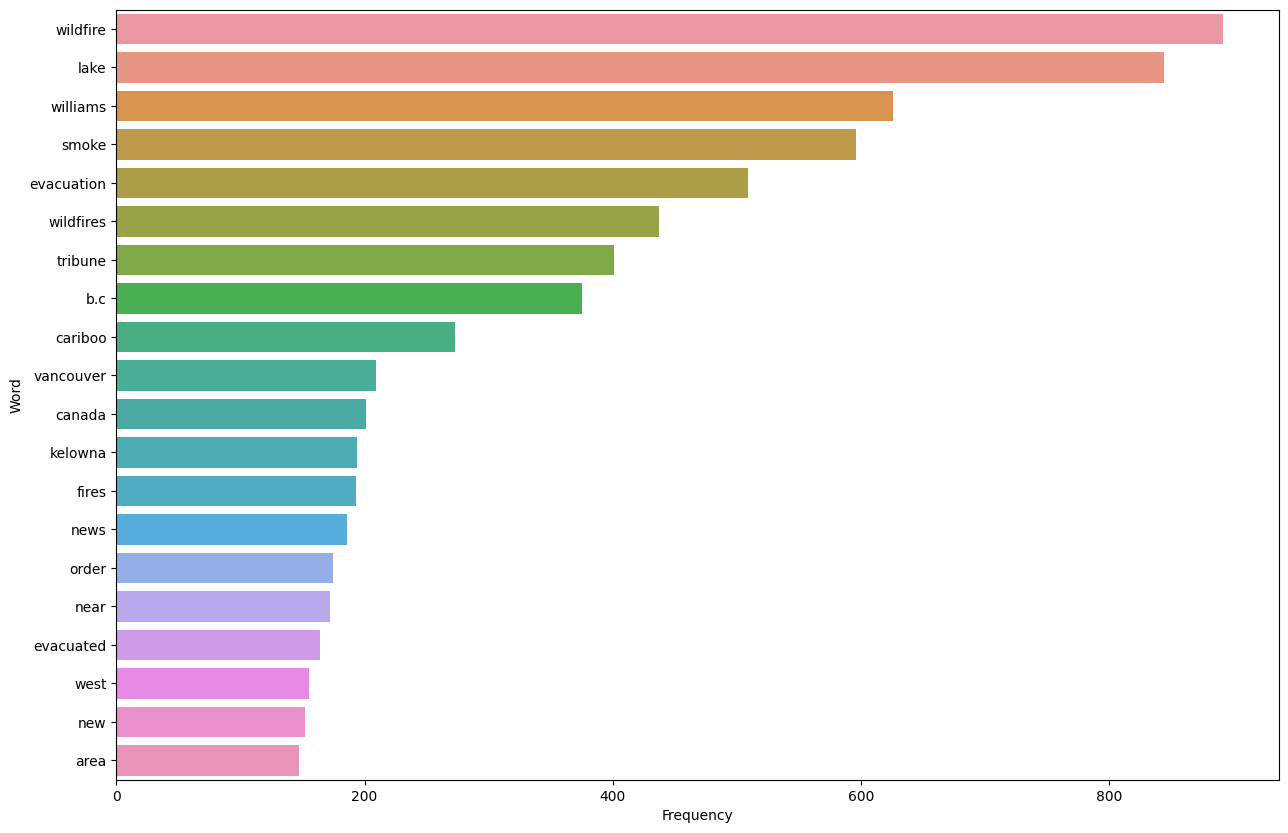

In [8]:
# create a fig with most keywords in titles
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from collections import Counter
from gensim.parsing.preprocessing import STOPWORDS


fig, ax = plt.subplots(figsize=(15, 10))
all_titles = ' '.join(df['title'].tolist())
all_titles = all_titles.lower()
words = word_tokenize(all_titles)
word_counts = Counter(words)
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)
word_counts_df = word_counts_df[word_counts_df['Word'].str.len() > 2]
word_counts_df = word_counts_df[~word_counts_df['Word'].isin(STOPWORDS)]

sns.barplot(x="Frequency", y="Word", data=word_counts_df.iloc[:20], ax=ax)
plt.show()

0    2023-08-20
1    2023-08-19
2    2023-08-19
3    2023-08-18
4    2023-08-18
Name: created_utc, dtype: object
created_utc
2023-08-18    148
2023-08-19    106
2023-08-20     83
2023-08-21     68
2023-08-23     45
             ... 
2022-02-17      2
2020-09-04      2
2021-02-19      2
2017-08-29      2
2021-10-24      2
Name: count, Length: 642, dtype: int64


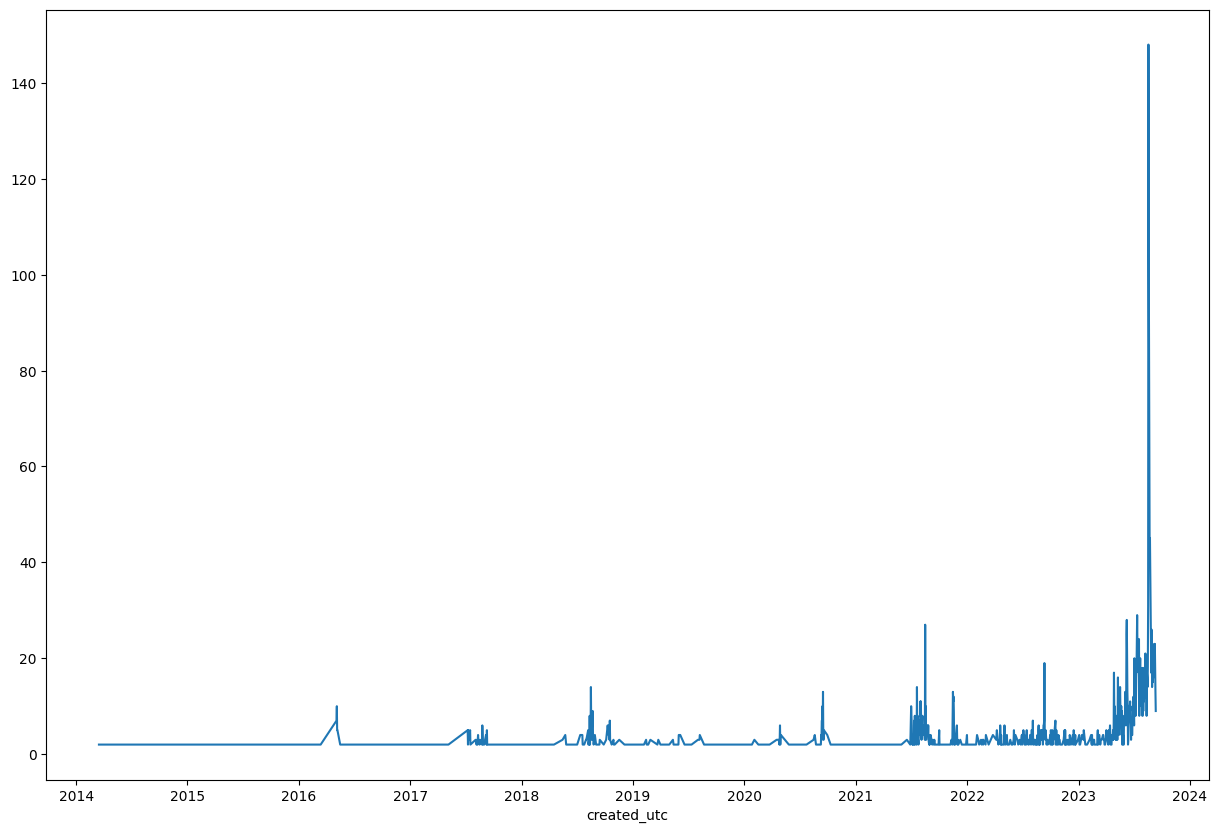

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df_copy = df.copy()
df_copy['created_utc'] = df_copy['created_utc'].apply(lambda x: pd.to_datetime(x, unit='s'))

daily_counts = df_copy['created_utc'].dt.date
print(daily_counts.head())
daily_counts = daily_counts.value_counts()
daily_counts = daily_counts[daily_counts > 1]
print(daily_counts)

fig, ax = plt.subplots(figsize=(15, 10))
daily_counts.plot(ax=ax)
plt.show()